In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from google.colab import files

In [201]:
def Mult_elem_sum(arr1, arr2, arr3): #suma(x1x2x3)
  arrt = []
  for xi in arr1:
    for yi in arr2:
      for zi in arr3:
        arrt.append(xi*yi*zi)
  return arrt


In [202]:
# @title Código Pesos
def Regresion_pesos_b(w, x, y):
    #ARRAYS
    u = np.ones(len(x))
    wx_2 = Mult_elem_sum(w,x,x)
    wy = Mult_elem_sum(w,y,1)
    wx = Mult_elem_sum(w,x,1)
    wxy = Mult_elem_sum(w,x,y)
    #DELTA
    delt = (np.sum(w)*np.sum(wx_2))-(np.sum(wx)**2)

    m = (np.sum(w)*np.sum(wxy)) - (np.sum(wx)*np.sum(wy))
    m = m/delt

    b = (np.sum(wx_2)*np.sum(wy)) - (np.sum(wx)*np.sum(wxy))

    formula = str(m)+"x +"+str(b)
    return

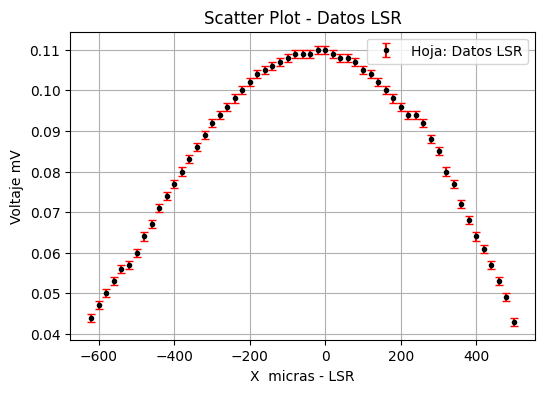

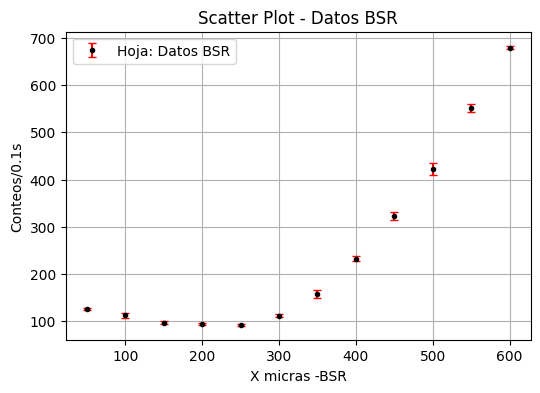

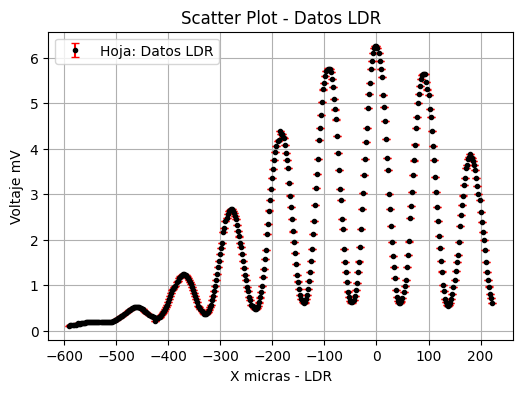

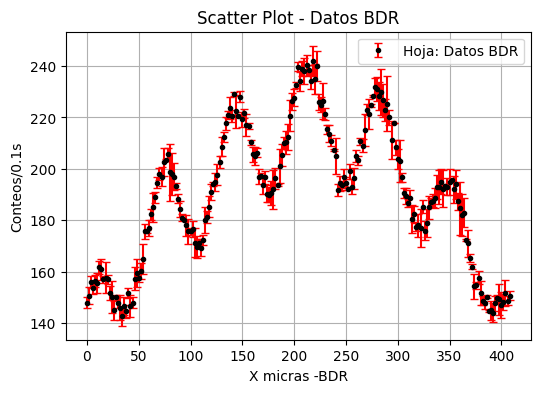

{'Datos LSR': {'x': [-620.0, -600.0, -580.0, -560.0, -540.0, -520.0, -500.0, -480.0, -460.0, -440.0, -420.0, -400.0, -380.0, -360.0, -340.0, -320.0, -300.0, -280.0, -260.0, -240.0, -220.0, -200.0, -180.0, -160.0, -140.0, -120.0, -100.0, -80.0, -60.0, -40.0, -20.0, 0.01, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220.0, 240.0, 260.0, 280.0, 300.0, 320.0, 340.0, 360.0, 380.0, 400.0, 420.0, 440.0, 460.0, 480.0, 500.0], 'y': [0.044, 0.047, 0.05, 0.053, 0.056, 0.057, 0.06, 0.064, 0.067, 0.071, 0.074, 0.077, 0.08, 0.083, 0.086, 0.089, 0.092, 0.094, 0.096, 0.098, 0.1, 0.102, 0.104, 0.105, 0.106, 0.107, 0.108, 0.109, 0.109, 0.109, 0.11, 0.11, 0.109, 0.108, 0.108, 0.107, 0.105, 0.104, 0.102, 0.1, 0.098, 0.096, 0.094, 0.094, 0.092, 0.088, 0.085, 0.08, 0.077, 0.072, 0.068, 0.064, 0.061, 0.057, 0.053, 0.049, 0.043], 'error': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.00

In [203]:
# @title Códgio gráficas Preinfrome
def plot_excel_sheets(excel_file):
    # Cargar todas las hojas
    sheets = pd.read_excel(excel_file, sheet_name=None)
    data_dict = {}

    for sheet_name, df in sheets.items():
        if df.shape[1] < 3:
            print(f"La hoja '{sheet_name}' tiene menos de 3 columnas, se omitirá.")
            continue

        # Seleccionar las primeras tres columnas
        x = df.iloc[:, 0]
        y = df.iloc[:, 1]
        error = df.iloc[:, 2]

        # Guardar los datos en el diccionario
        data_dict[sheet_name] = {'x': x.tolist(), 'y': y.tolist(), 'error': error.tolist()}

        # Crear la gráfica scatter con barras de error
        plt.figure(figsize=(6, 4))
        plt.errorbar(x, y, yerr=error, fmt='o', capsize=3, label=f'Hoja: {sheet_name}', color='black', ecolor='red', markersize=3)
        plt.xlabel(df.columns[0])
        plt.ylabel(df.columns[1])
        plt.title(f'Scatter Plot - {sheet_name}')
        plt.legend()
        plt.grid()
        plt.show()

    return data_dict
# Uso
Datos = plot_excel_sheets(r'/content/Datos Doble rendija.xlsx')  # Reemplaza con el nombre de tu archivo
print(Datos)

In [204]:
# @title Ajustes
def fit_curve(x, y, error, func, param_bounds):
    """
    Ajusta una función a los datos dados usando curve_fit.

    Parámetros:
    - x: Datos del eje X.
    - y: Datos del eje Y.
    - error: Errores en Y.
    - func: Función a ajustar.
    - param_bounds: Tuplas con los rangos de búsqueda para cada parámetro.

    Retorna:
    - popt: Parámetros óptimos del ajuste.
    - pcov: Matriz de covarianza del ajuste.
    - x_fit: Valores de X generados para la curva ajustada.
    - y_fit: Valores de Y ajustados.
    """
    try:
        popt, pcov = curve_fit(func, x, y, sigma=error, absolute_sigma=True, bounds=param_bounds, maxfev=10000, method='trf')
        x_fit = np.linspace(min(x), max(x), 500)
        y_fit = func(x_fit, *popt)
        return popt, pcov, x_fit, y_fit
    except RuntimeError:
        print("No se pudo ajustar la curva.")
        return None, None, None, None

def calcular_incertidumbre(cov_matrix, column_names):
    """
    Calcula la incertidumbre (raíz de la varianza) para cada columna a partir de la matriz de covarianza.

    Parámetros:
    - cov_matrix: ndarray (matriz de covarianza cuadrada de tamaño NxN)
    - column_names: lista de strings (nombre de cada variable)

    Retorna:
    - Diccionario con la incertidumbre de cada columna
    """
    if len(column_names) != cov_matrix.shape[0]:
        raise ValueError("El número de nombres de columnas no coincide con el tamaño de la matriz de covarianza")

    incertidumbres = {column_names[i]: np.sqrt(cov_matrix[i, i]) for i in range(len(column_names))}
    return incertidumbres


Parámetros óptimos: [0.33789016 0.39350754 1.35694798]
Matriz de covarianza:
[[ 1.57367269e-12  2.46597682e-14 -1.42424434e-12]
 [ 2.46597682e-14  8.13453639e-11  2.09027832e-10]
 [-1.42424434e-12  2.09027832e-10  1.82722225e-09]]
Incertidumbre de A:1.2544611146237593e-06
Incertidumbre de B:9.019166476154252e-06
Incertidumbre de C:4.274602033675571e-05


<ipython-input-205-57eaf0eddf6d>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(x, y_fit, 'r-', label=f'Ajuste: A={popt[0]:.2f}, B={popt[1]:.2f}, C={popt[2]:.2f}', color="blue")  # Curva ajustada


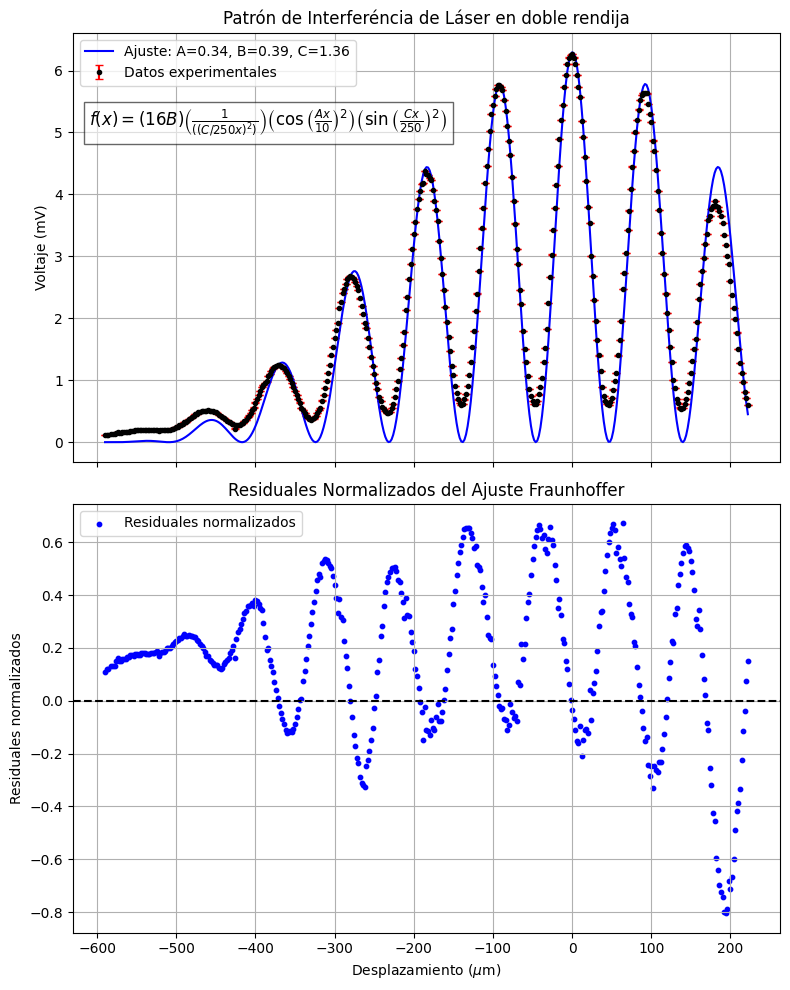

In [205]:
# @title Fitteo Láser Doble rendija
#Definimos nuestra Función
def fitting_function(x, A, B, C):
    return (16 * B) * (1 / ((C/250 *x)**2)) * (np.cos(A * x/10)**2) * (np.sin((C/ 250) * x)**2) #(16 * B) * (1 / ((A *x)**2)) * np.cos(A * 100 * x)**2 * np.sin((A / 4) * 100 * x)**2

#Sacamos los Datos
x= Datos["Datos LDR"]["x"]
y= Datos["Datos LDR"]["y"]
error = Datos["Datos LDR"]["error"]

#Evaluamos
popt, pcov, x_fit, y_fit = fit_curve(x, y, error, fitting_function, param_bounds=([1/100, 1/10, 1], [1/2, 1, 3]))#param_bounds=([1/100, 1], [100, 10]
print("Parámetros óptimos:", popt)
print("Matriz de covarianza:")
print(pcov)
incertidumbre_LDR = calcular_incertidumbre(pcov, ["A", "B", "C"])
print("Incertidumbre de A:"+str(incertidumbre_LDR["A"]))
print("Incertidumbre de B:"+str(incertidumbre_LDR["B"]))
print("Incertidumbre de C:"+str(incertidumbre_LDR["C"]))

#comparamos los valores:
def plot_fitted_curve(x, y, error, fitting_function, popt):
    # Generar valores ajustados de y usando la función de ajuste y los parámetros obtenidos
    x_fit = np.linspace(min(x), max(x), 406)  # Generamos valores de x para la curva ajustada
    y_fit = fitting_function(x_fit, *popt)  # Generamos los valores de y para la curva ajustada

    residuals_normalized = (y - y_fit)

    # Crear la figura y los subgráficos (dos filas)
    fig, ax = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

    # Gráfico de los datos y la curva ajustada
    ax[0].errorbar(x, y, yerr=error, fmt='o', capsize=3, label='Datos experimentales', color='black', ecolor='red', markersize=3)  # Datos originales
    formula = (r"$f(x) = (16 B) \left( \frac{1}{((C/250 x)^2)} \right) "
                r"\left( \cos\left( \frac{A x}{10} \right)^2 \right) "
                 r"\left( \sin\left( \frac{C x}{250} \right)^2 \right)$")

    ax[0].text(-610, 5.4, formula, fontsize=12, ha='left', va='top', bbox=dict(facecolor='white', edgecolor='black', alpha=0.6))
    ax[0].plot(x, y_fit, 'r-', label=f'Ajuste: A={popt[0]:.2f}, B={popt[1]:.2f}, C={popt[2]:.2f}', color="blue")  # Curva ajustada
    ax[0].set_title('Patrón de Interferéncia de Láser en doble rendija')
    ax[0].set_ylabel(r'Voltaje (mV)')
    ax[0].legend()
    ax[0].grid(True)

    # Gráfico de los residuales normalizados
    ax[1].scatter(x, residuals_normalized, color='blue', label='Residuales normalizados',s=10)
    ax[1].axhline(0, color='black', linestyle='--')  # Línea horizontal en 0 para referencia
    ax[1].set_xlabel(r'Desplazamiento ($\mu$m)')
    ax[1].set_ylabel('Residuales normalizados')
    ax[1].set_title('Residuales Normalizados del Ajuste Fraunhoffer')
    ax[1].legend()
    ax[1].grid(True)

    # Mostrar y guardar el gráfico
    #plt.savefig('/content/Ajuste_Doble_Rendija.pdf', format='pdf')
    #files.download('/content/Ajuste_Doble_Rendija.pdf')

    plt.tight_layout()
    plt.show()



plot_fitted_curve(x, y, error, fitting_function, popt)


Parámetros óptimos: [ 1.10685803e-01 -3.54102109e+01  4.25195366e+02]
Matriz de covarianza:
[[ 1.85271757e-07 -3.34099258e-05 -8.39842800e-04]
 [-3.34099258e-05  4.27288391e+00  5.29868567e-01]
 [-8.39842800e-04  5.29868567e-01  8.82425195e+00]]
Incertidumbre de A:0.00043043205871627513
Incertidumbre de mu:2.0670955245623786
Incertidumbre de sigma:2.9705642478329457


<ipython-input-206-2f0e58873225>:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(x, y_fit, 'r-', label=f'Ajuste: A={popt[0]:.2f}, B={popt[1]:.2f}', color="blue")  # Curva ajustada


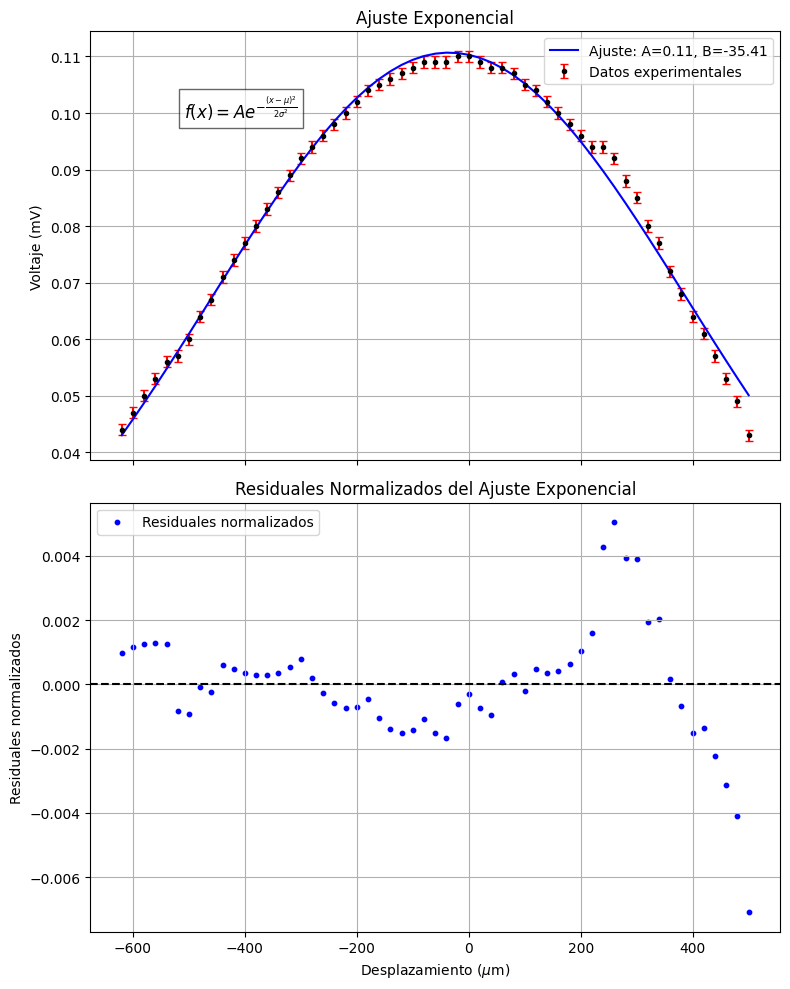

In [206]:
#@title Fitteo Láser Rendija única

# Definimos nuestra nueva función exponencial
def fitting_function(x, A,mu, sigma):
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Sacamos los Datos
x = Datos["Datos LSR"]["x"]
y = Datos["Datos LSR"]["y"]
error = Datos["Datos LSR"]["error"]

def fit_gaussian(x, y):
    # Estimación inicial de parámetros [A, mu, sigma]
    A_init = max(y)
    mu_init = x[np.argmax(y)]
    sigma_init = (max(x) - min(x)) / 6  # Aproximadamente el ancho de la campana

    try:
        popt, pcov = curve_fit(fitting_function, x, y, p0=[A_init, mu_init, sigma_init])
        return popt, pcov  # Devuelve los parámetros óptimos y la covarianza
    except RuntimeError:
        print("No se pudo ajustar la curva.")
        return None, None
# Evaluamos
popt, pcov = fit_gaussian(x, y)
print("Parámetros óptimos:", popt)
print("Matriz de covarianza:")
print(pcov)
incertidumbre_LDR = calcular_incertidumbre(pcov, ["A", "mu", "sigma"])
print("Incertidumbre de A:"+str(incertidumbre_LDR["A"]))
print("Incertidumbre de mu:"+str(incertidumbre_LDR["mu"]))
print("Incertidumbre de sigma:"+str(incertidumbre_LDR["sigma"]))

# Comparamos los valores:
def plot_fitted_curve(x, y, error, fitting_function, popt):
    # Generar valores ajustados de y usando la función de ajuste y los parámetros obtenidos
    x_fit = np.linspace(min(x), max(x), 57)  # Generamos valores de x para la curva ajustada
    y_fit = fitting_function(x_fit, *popt)  # Generamos los valores de y para la curva ajustada

    residuals_normalized = (y - y_fit)

    # Crear la figura y los subgráficos (dos filas)
    fig, ax = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

    # Gráfico de los datos y la curva ajustada
    ax[0].errorbar(x, y, yerr=error, fmt='o', capsize=3, label='Datos experimentales', color='black', ecolor='red', markersize=3)  # Datos originales
    formula = r"$f(x) = A e^{-\frac{(x - \mu)^2}{2\sigma^2}}$"
    x_pos = min(x) + 0.1 * (max(x) - min(x))  # 10% a la derecha del mínimo
    y_pos = max(y) - 0.1 * (max(y) - min(y))  # 10% abajo del máximo
    ax[0].text(x_pos, y_pos, formula, fontsize=12, ha='left', va='top', bbox=dict(facecolor='white', edgecolor='black', alpha=0.6))
    ax[0].plot(x, y_fit, 'r-', label=f'Ajuste: A={popt[0]:.2f}, B={popt[1]:.2f}', color="blue")  # Curva ajustada
    ax[0].set_title('Ajuste Exponencial')
    ax[0].set_ylabel(r'Voltaje (mV)')
    ax[0].legend()
    ax[0].grid(True)

    # Gráfico de los residuales normalizados
    ax[1].scatter(x, residuals_normalized, color='blue', label='Residuales normalizados',s=10)
    ax[1].axhline(0, color='black', linestyle='--')  # Línea horizontal en 0 para referencia
    ax[1].set_xlabel(r'Desplazamiento ($\mu$m)')
    ax[1].set_ylabel('Residuales normalizados')
    ax[1].set_title('Residuales Normalizados del Ajuste Exponencial')
    ax[1].legend()
    ax[1].grid(True)

    # Mostrar y guardar el gráfico
    #plt.savefig('/content/Ajuste_single_slit.pdf', format='pdf')
    #files.download('/content/Ajuste_single_slit.pdf')

    plt.tight_layout()
    plt.show()

plot_fitted_curve(x, y, error, fitting_function, popt)

Parámetros óptimos: [  3.17788292 500.          63.58793509]
Matriz de covarianza:
[[ 5.20282914e-08 -4.63175967e-04  4.66708133e-07]
 [-4.63175967e-04  1.10222634e+01 -9.27855903e-03]
 [ 4.66708133e-07 -9.27855903e-03  9.33353804e-06]]
Incertidumbre de A:0.0002280971095201783
Incertidumbre de B:3.319979431023301
Incertidumbre de C:0.003055083966016563


<ipython-input-259-6b69b94a2edc>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(x, y_fit, 'r-', label=f'Ajuste: A={popt[0]:.2f}, B={popt[1]:.2f}, C={popt[2]:.2f}', color="blue")  # Curva ajustada


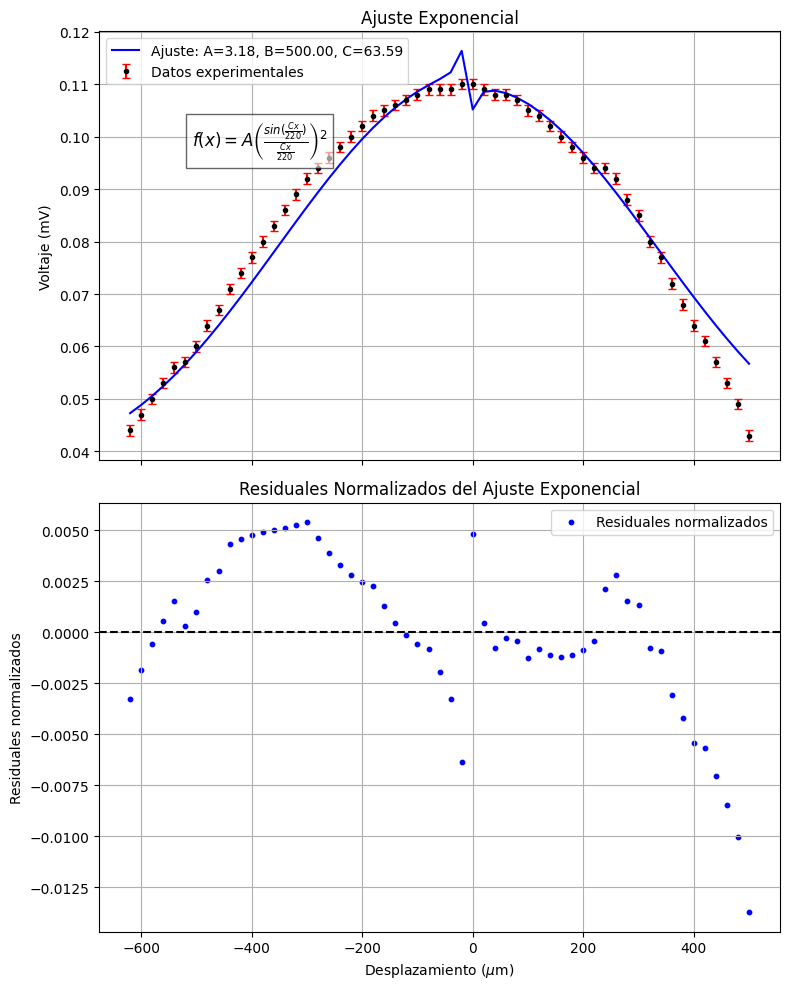

In [259]:
#@title Fitteo Láser Rendija única

# Definimos nuestra nueva función exponencial
def fitting_function(x, A,B, C):
    return (B * (np.sin((C*x/200)+A)/((C*x/200)+A))**2) + 0.04

# Sacamos los Datos
x = Datos["Datos LSR"]["x"]
y = Datos["Datos LSR"]["y"]
error = Datos["Datos LSR"]["error"]


# Evaluamos
popt, pcov, x_fit, y_fit = fit_curve(x,y, error, fitting_function, param_bounds=([3, 500, 60], [6, 550, 70]))
print("Parámetros óptimos:", popt)
print("Matriz de covarianza:")
print(pcov)
incertidumbre_LDR = calcular_incertidumbre(pcov, ["A", "B", "C"])
print("Incertidumbre de A:"+str(incertidumbre_LDR["A"]))
print("Incertidumbre de B:"+str(incertidumbre_LDR["B"]))
print("Incertidumbre de C:"+str(incertidumbre_LDR["C"]))

# Comparamos los valores:
def plot_fitted_curve(x, y, error, fitting_function, popt):
    # Generar valores ajustados de y usando la función de ajuste y los parámetros obtenidos
    x_fit = np.linspace(min(x), max(x), 57)  # Generamos valores de x para la curva ajustada
    y_fit = fitting_function(x_fit, *popt)  # Generamos los valores de y para la curva ajustada

    residuals_normalized = (y - y_fit)

    # Crear la figura y los subgráficos (dos filas)
    fig, ax = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

    # Gráfico de los datos y la curva ajustada
    ax[0].errorbar(x, y, yerr=error, fmt='o', capsize=3, label='Datos experimentales', color='black', ecolor='red', markersize=3)  # Datos originales
    formula = r"$f(x) = A \left(\frac{sin(\frac{Cx}{220})}{\frac{Cx}{220}}\right)^2$"
    x_pos = min(x) + 0.1 * (max(x) - min(x))  # 10% a la derecha del mínimo
    y_pos = max(y) - 0.1 * (max(y) - min(y))  # 10% abajo del máximo
    ax[0].text(x_pos, y_pos, formula, fontsize=12, ha='left', va='top', bbox=dict(facecolor='white', edgecolor='black', alpha=0.6))
    ax[0].plot(x, y_fit, 'r-', label=f'Ajuste: A={popt[0]:.2f}, B={popt[1]:.2f}, C={popt[2]:.2f}', color="blue")  # Curva ajustada
    ax[0].set_title('Ajuste Exponencial')
    ax[0].set_ylabel(r'Voltaje (mV)')
    ax[0].legend()
    ax[0].grid(True)

    # Gráfico de los residuales normalizados
    ax[1].scatter(x, residuals_normalized, color='blue', label='Residuales normalizados',s=10)
    ax[1].axhline(0, color='black', linestyle='--')  # Línea horizontal en 0 para referencia
    ax[1].set_xlabel(r'Desplazamiento ($\mu$m)')
    ax[1].set_ylabel('Residuales normalizados')
    ax[1].set_title('Residuales Normalizados del Ajuste Exponencial')
    ax[1].legend()
    ax[1].grid(True)

    # Mostrar y guardar el gráfico
    #plt.savefig('/content/Ajuste_single_slit.pdf', format='pdf')
    #files.download('/content/Ajuste_single_slit.pdf')

    plt.tight_layout()
    plt.show()

plot_fitted_curve(x, y, error, fitting_function, popt)

In [266]:


print(np.pi*100*(10**-6)/((63.588/250)))



0.0012351358171312956
